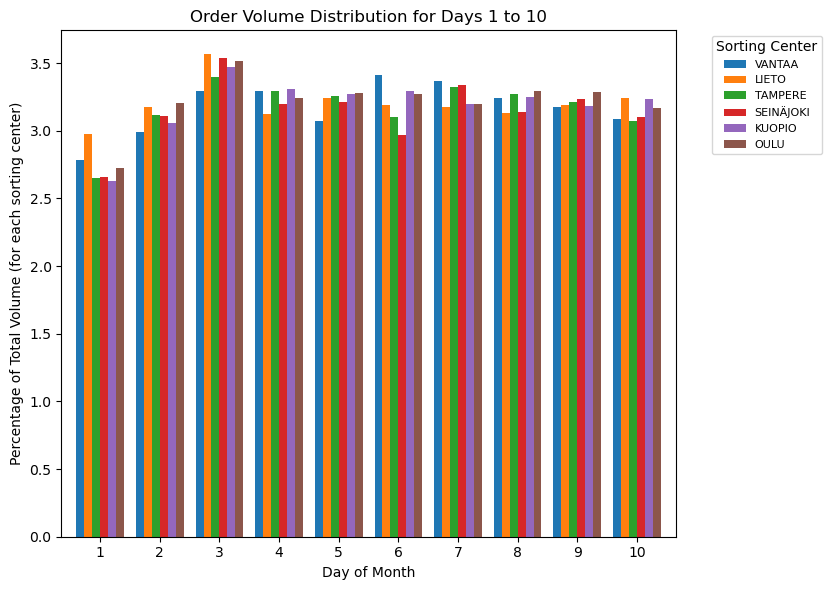

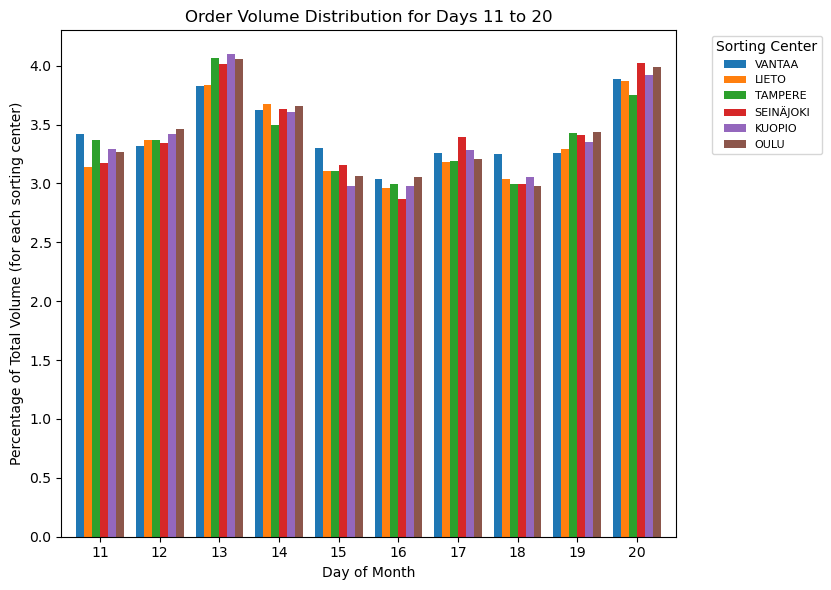

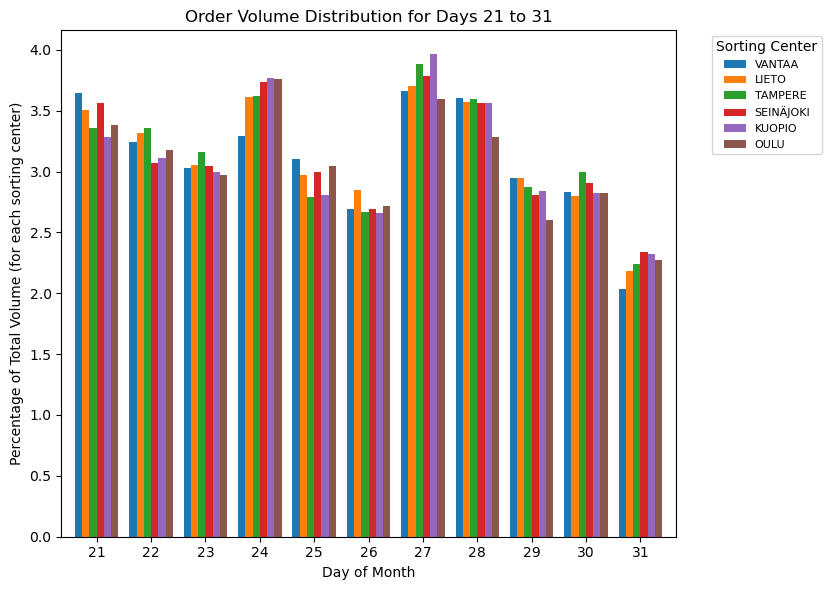

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r"C:\Users\Sun Dexin\Desktop\SHUJU\sorting_event_volumes_2023.csv"




data = pd.read_csv(file_path)


data['scanning_date'] = pd.to_datetime(data['scanning_date'])


data['day_of_month'] = data['scanning_date'].dt.day


def categorize_day(day):
    if day <= 10:
        return '1-10'
    elif 11 <= day <= 20:
        return '11-20'
    else:
        return '21-31'


data['day_segment'] = data['day_of_month'].apply(categorize_day)


sorting_centers = data['sorting_center_name'].unique()


def plot_data_for_segment(segment, title):
   
    segment_data = data[data['day_segment'] == segment]

    
    result = pd.DataFrame()

    
    for center in sorting_centers:
        center_data = segment_data[segment_data['sorting_center_name'] == center]

        
        center_total_volume = data[data['sorting_center_name'] == center]['no_of_events'].sum()

     
        daily_volume = center_data.groupby('day_of_month')['no_of_events'].sum()

       
        percentage = (daily_volume / center_total_volume) * 100
        result[center] = percentage


    result.plot(kind='bar', figsize=(10, 6), width=0.8)


    plt.legend(title='Sorting Center', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})

   
    plt.title(f'Order Volume Distribution for {title}')
    plt.xlabel('Day of Month')
    plt.ylabel('Percentage of Total Volume (for each sorting center)')


    plt.xticks(rotation=0)


    plt.tight_layout(rect=[0, 0, 0.85, 1]) 
    plt.show()

plot_data_for_segment('1-10', 'Days 1 to 10')
plot_data_for_segment('11-20', 'Days 11 to 20')
plot_data_for_segment('21-31', 'Days 21 to 31')



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = input("Please enter the path to your data file (e.g., C:/path/to/your/sorting_event_volumes_2023.csv): ")




data = pd.read_csv(file_path)


data['scanning_date'] = pd.to_datetime(data['scanning_date'])


data['day_of_month'] = data['scanning_date'].dt.day


def categorize_day(day):
    if day <= 10:
        return '1-10'
    elif 11 <= day <= 20:
        return '11-20'
    else:
        return '21-31'


data['day_segment'] = data['day_of_month'].apply(categorize_day)


sorting_centers = data['sorting_center_name'].unique()


def plot_data_for_segment(segment, title):

    segment_data = data[data['day_segment'] == segment]


    result = pd.DataFrame()


    for center in sorting_centers:
        center_data = segment_data[segment_data['sorting_center_name'] == center]


        center_total_volume = data[data['sorting_center_name'] == center]['no_of_events'].sum()


        daily_volume = center_data.groupby('day_of_month')['no_of_events'].sum()


        percentage = (daily_volume / center_total_volume) * 100
        result[center] = percentage


    result.plot(kind='bar', figsize=(10, 6), width=0.8)


    plt.legend(title='Sorting Center', bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8})


    plt.title(f'Order Volume Distribution for {title}')
    plt.xlabel('Day of Month')
    plt.ylabel('Percentage of Total Volume (for each sorting center)')


    plt.xticks(rotation=0)


    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

plot_data_for_segment('1-10', 'Days 1 to 10')
plot_data_for_segment('11-20', 'Days 11 to 20')
plot_data_for_segment('21-31', 'Days 21 to 31')